In [59]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

In [60]:
data = pd.read_csv('bank-additional-full.csv', sep=';', header=0)
data = data.dropna()
print(data.shape)
print(list(data.columns))

(41188, 21)
['age', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'y']


In [61]:
data.head()

age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  ...  campaign  pdays  previous     poutcome emp.var.rate  \
0   may         mon  ...         1    999         0  nonexistent          1.1   
1   may         mon  ...         1    999         0  nonexistent          1.1   
2   may         mon  ...         1    999         0  nonexistent          1.1   
3   may         mon  ...         1    999         0  nonexistent          1.1   
4   may         mon  ...         1    999         0  nonexistent          1.1   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed   y  
0          93.994          -36.4      4.857       5191.0  no  
1          93.994          -36.4      4.857       5191.0  no  
2          93.994          -36.4      4.857       5191.0  no  
3          93.994          -36.4      4.857       5191.0  no  
4          93.994          -36.4      4.857       5191.0  no  

[5 rows x 21 columns]

In [62]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [63]:
data['y'] = data['y'].map({'yes': 1, 'no': 0})

In [64]:
data['education'].unique()

array(['basic.4y', 'high.school', 'basic.6y', 'basic.9y',
       'professional.course', 'unknown', 'university.degree',
       'illiterate'], dtype=object)

In [65]:
data['education'] = np.where(data['education'] == 'basic.9y', 'Basic', data['education'])
data['education'] = np.where(data['education'] == 'basic.6y', 'Basic', data['education'])
data['education'] = np.where(data['education'] == 'basic.4y', 'Basic', data['education'])

In [66]:
data['education'].unique()

array(['Basic', 'high.school', 'professional.course', 'unknown',
       'university.degree', 'illiterate'], dtype=object)

In [67]:
data['y'].value_counts()

y
0    36548
1     4640
Name: count, dtype: int64

C:\Users\USER\AppData\Local\Temp\ipykernel_22452\1927649197.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='y', data=data, palette='hls')


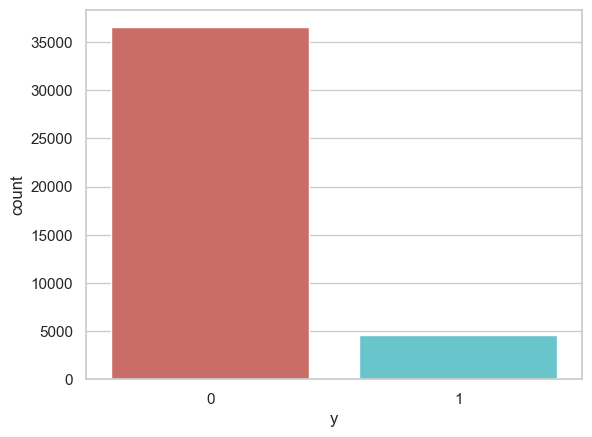

<Figure size 640x480 with 0 Axes>

In [ ]:
sns.countplot(x='y', data=data, palette='hls')
plt.show()


In [69]:
numeric_cols = data.select_dtypes(include='number').columns

In [70]:
data.groupby('y')[numeric_cols].mean()

age    duration  campaign       pdays  previous  emp.var.rate  \
y                                                                        
0  39.911185  220.844807  2.633085  984.113878  0.132374      0.248875   
1  40.913147  553.191164  2.051724  792.035560  0.492672     -1.233448   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed    y  
y                                                              
0       93.603757     -40.593097   3.811491  5176.166600  0.0  
1       93.354386     -39.789784   2.123135  5095.115991  1.0

In [71]:
data.groupby('job')[numeric_cols].mean()

age    duration  campaign       pdays  previous  \
job                                                                    
admin.         38.187296  254.312128  2.623489  954.319229  0.189023   
blue-collar    39.555760  264.542360  2.558461  985.160363  0.122542   
entrepreneur   41.723214  263.267857  2.535714  981.267170  0.138736   
housemaid      45.500000  250.454717  2.639623  960.579245  0.137736   
management     42.362859  257.058140  2.476060  962.647059  0.185021   
retired        62.027326  273.712209  2.476744  897.936047  0.327326   
self-employed  39.949331  264.142153  2.660802  976.621393  0.143561   
services       37.926430  258.398085  2.587805  979.974049  0.154951   
student        25.894857  283.683429  2.104000  840.217143  0.524571   
technician     38.507638  250.232241  2.577339  964.408127  0.153789   
unemployed     39.733728  249.451677  2.564103  935.316568  0.199211   
unknown        45.563636  239.675758  2.648485  938.727273  0.154545   

               emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  \
job                                                                     
admin.             0.015563       93.534054     -40.245433   3.550274   
blue-collar        0.248995       93.656656     -41.375816   3.771996   
entrepreneur       0.158723       93.605372     -41.283654   3.791120   
housemaid          0.433396       93.676576     -39.495283   4.009645   
management        -0.012688       93.522755     -40.489466   3.611316   
retired           -0.698314       93.430786     -38.573081   2.770066   
self-employed      0.094159       93.559982     -40.488107   3.689376   
services           0.175359       93.634659     -41.290048   3.699187   
student           -1.408000       93.331613     -40.187543   1.884224   
technician         0.274566       93.561471     -39.927569   3.820401   
unemployed        -0.111736       93.563781     -40.007594   3.466583   
unknown            0.357879       93.718942     -38.797879   3.949033   

               nr.employed         y  
job                                   
admin.         5164.125350  0.129726  
blue-collar    5175.615150  0.068943  
entrepreneur   5176.313530  0.085165  
housemaid      5179.529623  0.100000  
management     5166.650513  0.112175  
retired        5122.262151  0.252326  
self-employed  5170.674384  0.104856  
services       5171.600126  0.081381  
student        5085.939086  0.314286  
technician     5175.648391  0.108260  
unemployed     5157.156509  0.142012  
unknown        5172.931818  0.112121

In [72]:
data.groupby('marital')[numeric_cols].mean()

age    duration  campaign       pdays  previous  emp.var.rate  \
marital                                                                         
divorced  44.899393  253.790330   2.61340  968.639853  0.168690      0.163985   
married   42.307165  257.438623   2.57281  967.247673  0.155608      0.183625   
single    33.158714  261.524378   2.53380  949.909578  0.211359     -0.167989   
unknown   40.275000  312.725000   3.18750  937.100000  0.275000     -0.221250   

          cons.price.idx  cons.conf.idx  euribor3m  nr.employed         y  
marital                                                                    
divorced       93.606563     -40.707069   3.715603  5170.878643  0.103209  
married        93.597367     -40.270659   3.745832  5171.848772  0.101573  
single         93.517300     -40.918698   3.317447  5155.199265  0.140041  
unknown        93.471250     -40.820000   3.313038  5157.393750  0.150000

In [73]:
data.groupby('education')[numeric_cols].mean()

age    duration  campaign       pdays  previous  \
education                                                                    
Basic                42.163910  263.043874  2.559498  974.877967  0.141053   
high.school          37.998213  260.886810  2.568576  964.358382  0.185917   
illiterate           48.500000  276.777778  2.277778  943.833333  0.111111   
professional.course  40.080107  252.533855  2.586115  960.765974  0.163075   
university.degree    38.879191  253.223373  2.563527  951.807692  0.192390   
unknown              43.481225  262.390526  2.596187  942.830734  0.226459   

                     emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  \
education                                                                     
Basic                    0.191329       93.639933     -40.927595   3.729654   
high.school              0.032937       93.584857     -40.940641   3.556157   
illiterate              -0.133333       93.317333     -39.950000   3.516556   
professional.course      0.173012       93.569864     -40.124108   3.710457   
university.degree       -0.028090       93.493466     -39.975805   3.529663   
unknown                  0.059099       93.658615     -39.877816   3.571098   

                     nr.employed         y  
education                                   
Basic                5172.014113  0.087029  
high.school          5164.994735  0.108355  
illiterate           5171.777778  0.222222  
professional.course  5170.155979  0.113485  
university.degree    5163.226298  0.137245  
unknown              5159.549509  0.145003

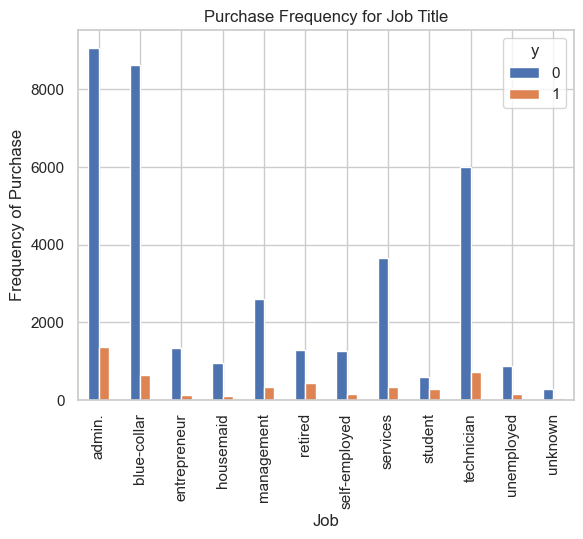

In [ ]:
%matplotlib inline
pd.crosstab(data.job, data.y).plot(kind='bar')
plt.title('Purchase Frequency for Job Title')
plt.xlabel('Job')
plt.ylabel('Frequency of Purchase')


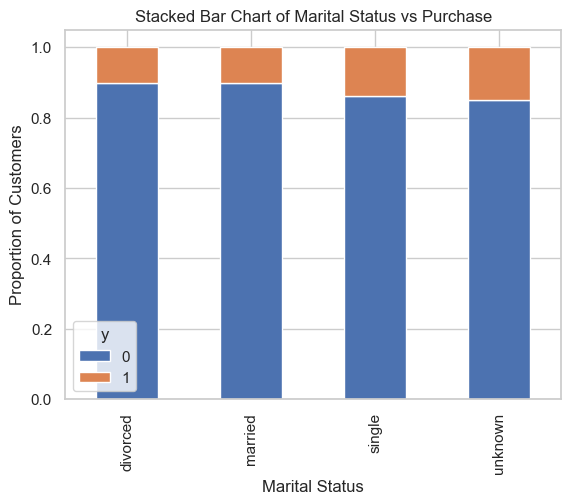

In [ ]:
table = pd.crosstab(data.marital, data.y)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Marital Status vs Purchase')
plt.xlabel('Marital Status')
plt.ylabel('Proportion of Customers')


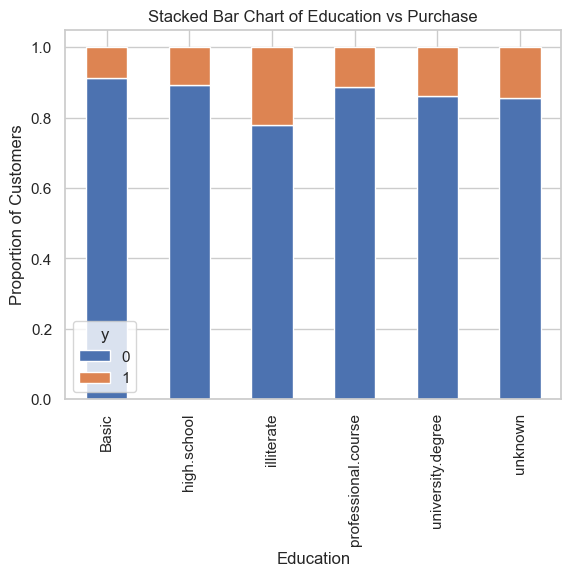

In [ ]:
table = pd.crosstab(data.education, data.y)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Education vs Purchase')
plt.xlabel('Education')
plt.ylabel('Proportion of Customers')


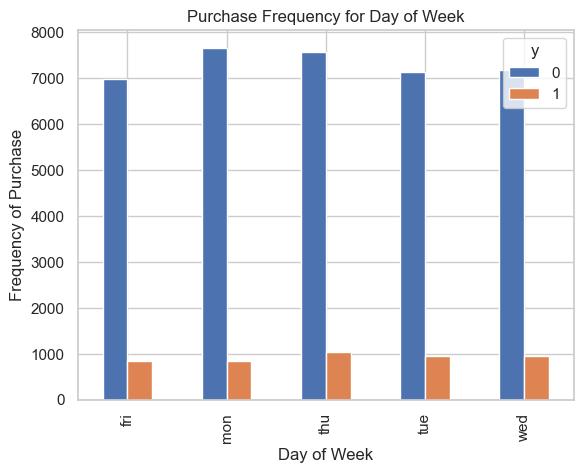

In [ ]:
pd.crosstab(data.day_of_week, data.y).plot(kind='bar')
plt.title('Purchase Frequency for Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Frequency of Purchase')


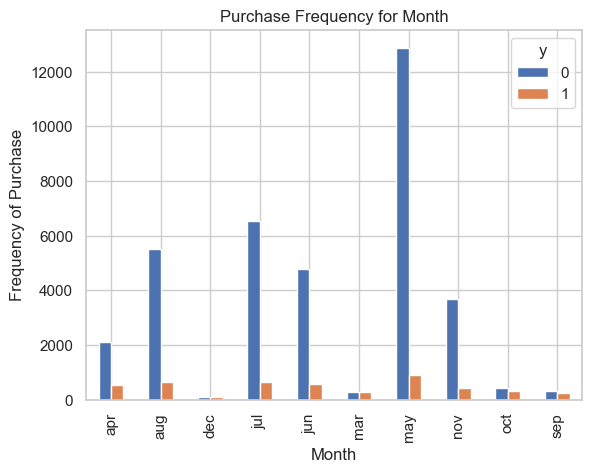

In [ ]:
pd.crosstab(data.month, data.y).plot(kind='bar')
plt.title('Purchase Frequency for Month')
plt.xlabel('Month')
plt.ylabel('Frequency of Purchase')


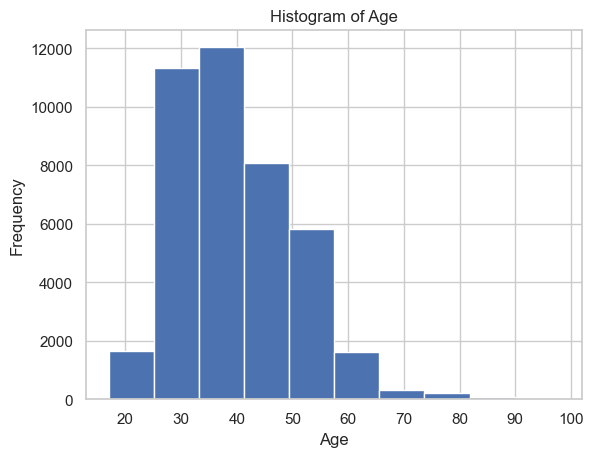

In [ ]:
data.age.hist()
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')


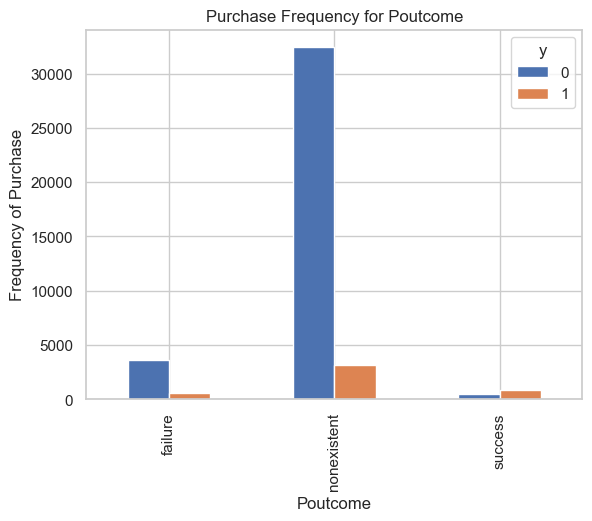

In [ ]:
pd.crosstab(data.poutcome, data.y).plot(kind='bar')
plt.title('Purchase Frequency for Poutcome')
plt.xlabel('Poutcome')
plt.ylabel('Frequency of Purchase')


In [81]:
cat_vars = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']
for var in cat_vars:
    cat_list = pd.get_dummies(data[var], prefix=var)
    data = data.join(cat_list)

In [82]:
data_vars = data.columns.values.tolist()
to_keep = [i for i in data_vars if i not in cat_vars]

In [83]:
data_final = data[to_keep]
data_final.columns.values

array(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'y',
       'job_admin.', 'job_blue-collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired',
       'job_self-employed', 'job_services', 'job_student',
       'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'marital_unknown', 'education_Basic', 'education_high.school',
       'education_illiterate', 'education_professional.course',
       'education_university.degree', 'education_unknown', 'default_no',
       'default_unknown', 'default_yes', 'housing_no', 'housing_unknown',
       'housing_yes', 'loan_no', 'loan_unknown', 'loan_yes',
       'contact_cellular', 'contact_telephone', 'month_apr', 'month_aug',
       'month_dec', 'month_jul', 'month_jun', 'month_mar', 'month_may',
       'month_nov', 'month_oct', 'month_sep', 'day_of_week_fri',

In [84]:
data_final.shape

(41188, 62)

In [85]:
X = data_final.drop(columns=['y'])
y = data_final['y']

In [86]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

logreg = LogisticRegression(solver='liblinear', max_iter=2000)
rfe = RFE(estimator=logreg, n_features_to_select=20)
rfe = rfe.fit(X, y.values.ravel())
print(rfe.support_)
print(rfe.ranking_)

[False False False False  True False False False  True False False  True
 False False False  True False  True  True False False False False False
 False False  True  True False False False False  True False False False
 False False False False False False  True  True  True  True False False
  True  True  True False False False  True False False False  True  True
  True]
[33 31 11 40  1 12 15 16  1 25  9  1 23 39 36  1 30  1  1 18 21 38 10 13
 22 41  1  1 37  2  3  4  1 14 42 34 29 35 17 28 27  6  1  1  1  1 19 20
  1  1  1 26  8  7  1 32 24  5  1  1  1]


In [87]:
selected_features = X.columns[rfe.support_]
print(selected_features)

Index(['previous', 'euribor3m', 'job_blue-collar', 'job_retired',
       'job_services', 'job_student', 'education_Basic',
       'education_high.school', 'default_no', 'contact_telephone', 'month_apr',
       'month_aug', 'month_dec', 'month_mar', 'month_may', 'month_nov',
       'day_of_week_mon', 'poutcome_failure', 'poutcome_nonexistent',
       'poutcome_success'],
      dtype='object')


In [88]:
data_final[selected_features].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   previous               41188 non-null  int64  
 1   euribor3m              41188 non-null  float64
 2   job_blue-collar        41188 non-null  bool   
 3   job_retired            41188 non-null  bool   
 4   job_services           41188 non-null  bool   
 5   job_student            41188 non-null  bool   
 6   education_Basic        41188 non-null  bool   
 7   education_high.school  41188 non-null  bool   
 8   default_no             41188 non-null  bool   
 9   contact_telephone      41188 non-null  bool   
 10  month_apr              41188 non-null  bool   
 11  month_aug              41188 non-null  bool   
 12  month_dec              41188 non-null  bool   
 13  month_mar              41188 non-null  bool   
 14  month_may              41188 non-null  bool   
 15  mo

In [89]:
X = data_final[selected_features]
y = data_final['y']

In [90]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [91]:
import statsmodels.api as sm
# Convert boolean columns to int for statsmodels compatibility
X_int = X.astype(int)
logit_model = sm.Logit(y, sm.add_constant(X_int))  # Add constant for intercept
result = logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.280360
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                41188
Model:                          Logit   Df Residuals:                    41168
Method:                           MLE   Df Model:                           19
Date:                Tue, 10 Jun 2025   Pseudo R-squ.:                  0.2036
Time:                        17:34:24   Log-Likelihood:                -11547.
converged:                       True   LL-Null:                       -14499.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.2800        nan        nan        nan         nan         

In [92]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import LogisticRegression
kfold = KFold(n_splits=10, shuffle=True, random_state=7)
modelCV = LogisticRegression(max_iter=1000)
scoring = 'accuracy'
results = cross_val_score(modelCV, X_train, y_train, cv=kfold, scoring=scoring)
print("10-fold cross validation average accuracy: %.2f" % results.mean())

10-fold cross validation average accuracy: 0.90


In [93]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logreg = LogisticRegression()

In [94]:
logreg.fit(X_train, y_train)

LogisticRegression()

In [95]:
accuracy = logreg.score(X_test, y_test)
print(f"Accuracy of logistic regression classifier on test set: {accuracy:.2f}")

Accuracy of logistic regression classifier on test set: 0.90


In [96]:
y_pred = logreg.predict(X_test)

In [97]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[10845   124]
 [ 1119   269]]


In [98]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.99      0.95     10969
           1       0.68      0.19      0.30      1388

    accuracy                           0.90     12357
   macro avg       0.80      0.59      0.62     12357
weighted avg       0.88      0.90      0.87     12357



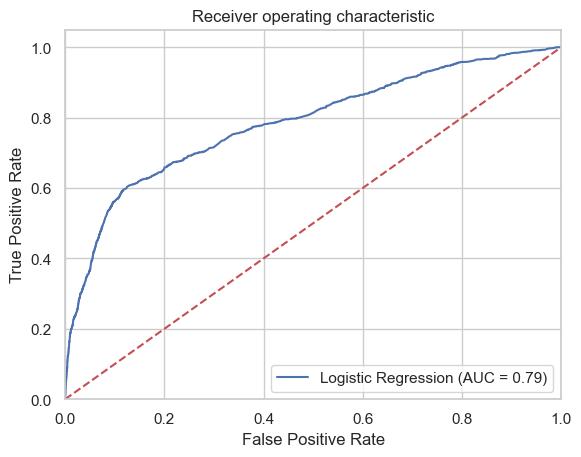

In [99]:
from sklearn.metrics import roc_auc_score, roc_curve
y_proba = logreg.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
auc_score = roc_auc_score(y_test, y_proba)
plt.figure()
plt.plot(fpr, tpr, label=f'Logistic Regression (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()